# k-NearestNeighbors classifier

Demonstration of the k-Nearest Neighbors algorithm applied to a classification problem with the Kaggle titanic dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [9]:
# read in data
df = pd.read_csv('../datasets/train.csv')

In [15]:
# drop unnecessary columns, any nan values and set the index
train_df = df.copy().drop(columns=['Name','Ticket','Cabin']).set_index('PassengerId').dropna()

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [34]:
# split into features and labels
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [35]:
# preprocess the data so it can be used in the kNN algorithm
X['Sex'].replace({'male':0,'female':1},inplace=True)
X['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [48]:
# perform a train-test split of the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.75,random_state=0)

In [54]:
# scale the data 
X_train_scaled = preprocessing.StandardScaler().fit_transform(X_train)

In [55]:
# build a and fit a kNN model
model = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled,y_train)

In [56]:
# score the model on the test dataset
score = model.score(X_test,y_test)

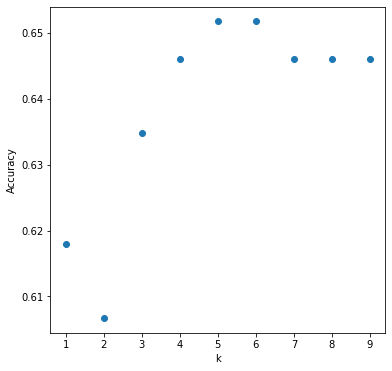

In [69]:
# try different values of K
scores = []
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    
fig = plt.figure(figsize=(6,6))
plt.scatter(range(1,10),scores)
plt.xlabel('k')
plt.ylabel('Accuracy');

euclidean
manhattan
chebyshev
minkowski


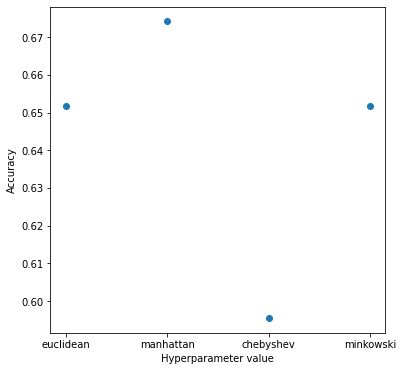

In [70]:
# try different parameters
params = ['euclidean','manhattan','chebyshev','minkowski']
scores = []
for param in params:
    print(param)
    model = KNeighborsClassifier(n_neighbors=5,metric=param).fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    
fig = plt.figure(figsize=(6,6))
plt.scatter(params,scores)
plt.xlabel('Hyperparameter value')
plt.ylabel('Accuracy');

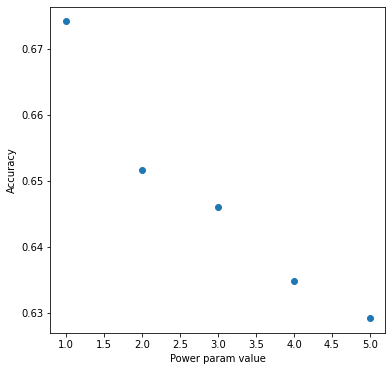

In [71]:
# try different values of p in minkowski
p_vals = range(1,6)
scores = []
for p in p_vals:
    model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=p).fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    
fig = plt.figure(figsize=(6,6))
plt.scatter(p_vals,scores)
plt.xlabel('Power param value')
plt.ylabel('Accuracy');